# Manually Separating Phases, version 8

## Load packages.

In [1]:
require(abind)
require(data.table)
require(deSolve)
require(LaplacesDemon)
require(magrittr)
require(np)
require(rTensor)

require(ggplot2)
require(GGally)


Loading required package: abind
Loading required package: data.table
Loading required package: deSolve
Loading required package: magrittr
Loading required package: np
Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-9)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]
Loading required package: rTensor
Loading required package: ggplot2
Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


## Example application

### Read results.

In [2]:
xs <- fread("xs-v7.csv")
setkeyv(xs, c("i1", "i2", "i3"))
xs %>% dim

[1] 54744    15

In [3]:
ys <- fread("ys-v7.csv")
setkeyv(ys, c("sequence", "t"))
ys %>% dim

[1] 782103      5

### Extract sampling pattern.

In [49]:
x <- xs[probed == TRUE, .(x1, x2, x3)]
x %>% dim

[1] 2508    3

### Compute splits.

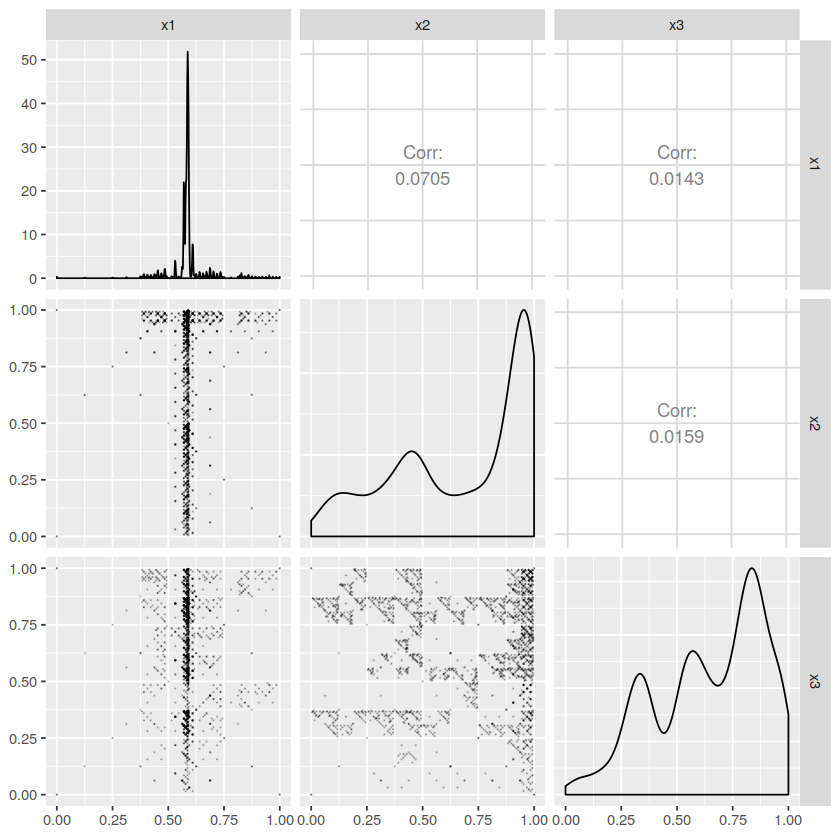

In [50]:
ggpairs(x, 1:3, lower = list(continuous = wrap("points", alpha = 0.2, size=0.05)))

#### Split on `x1`.

In [51]:
splits.1 <- Mode(x[, x1])
x[, S1 := x1 > splits.1]
splits.1

[1] 0.5879436

#### Left `x1` split on `x2`.

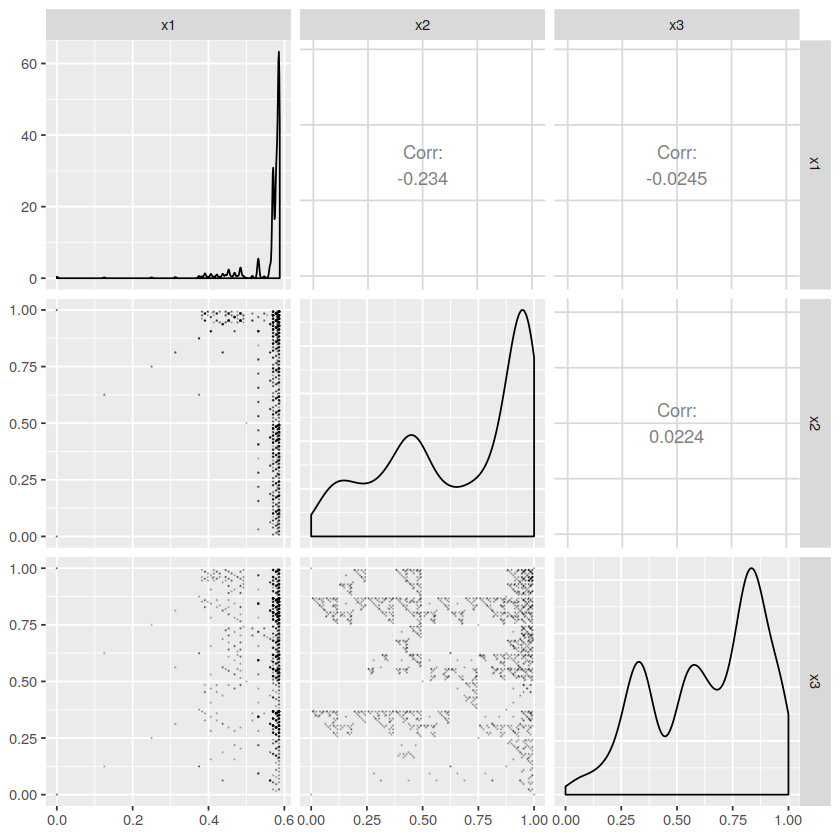

In [52]:
ggpairs(x[S1 == FALSE], 1:3,, lower = list(continuous = wrap("points", alpha = 0.2, size=0.05)))

In [53]:
splits.1L2 <- Mode(x[S1 == FALSE, x2])
x[, S1L2 := x2 > splits.1L2]
splits.1L2

[1] 0.9470204

In [ ]:
#### Right `x1` split on `

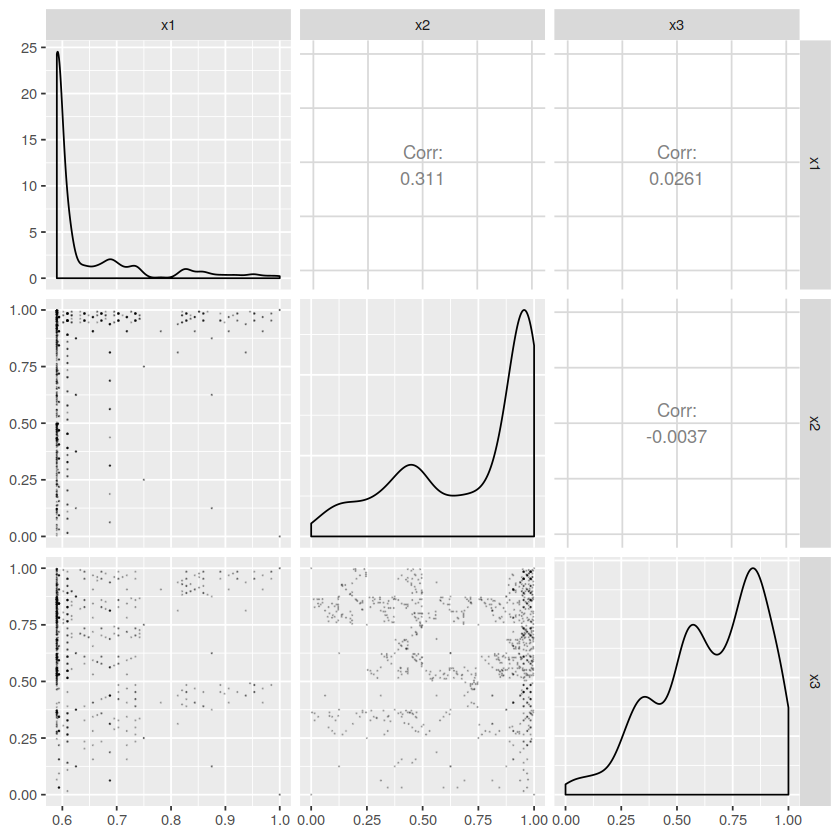

In [54]:
ggpairs(x[S1 == TRUE], 1:3, lower = list(continuous = wrap("points", alpha = 0.2, size=0.05)))

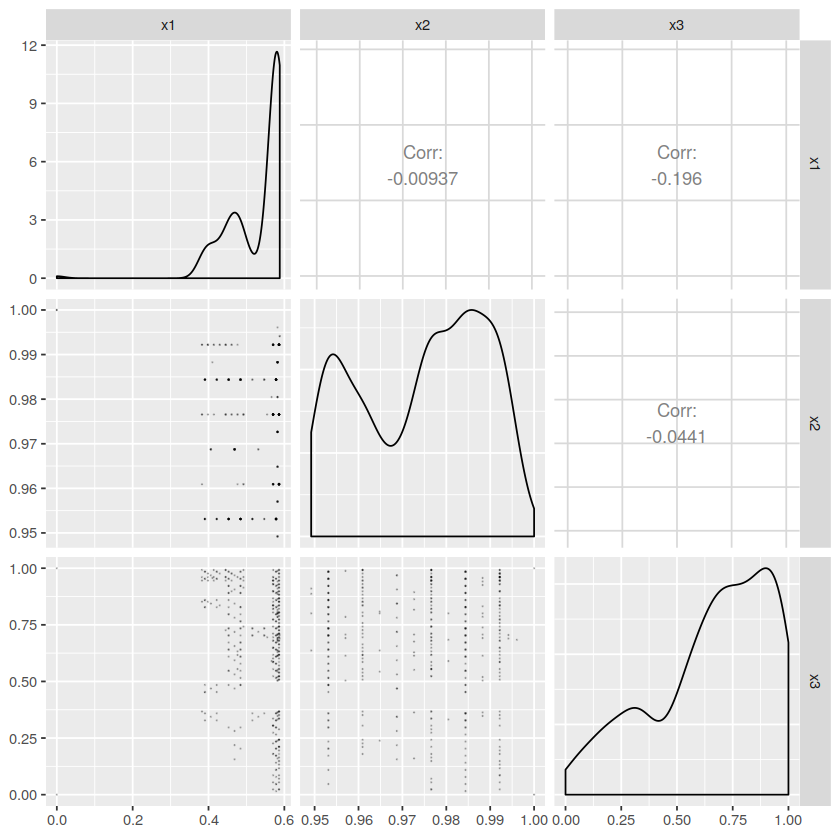

In [40]:
ggpairs(
    x[S1 == FALSE & S12 == TRUE],
    1:3,
#   mapping = aes(color=factor(mapply(ssa.depth, i1))),
    lower = list(continuous = wrap("points", alpha = 0.2, size=0.05))
)

In [58]:
Modes(x$x1, min.size=0.2)$modes

[1] 0.5879436

In [68]:
Modes(x$x2)$modes[1:2]

[1] 0.9554006 0.4514414

In [69]:
Modes(x$x3)$modes

[1] 0.8371110 0.5709053 0.3345544